<a href="https://colab.research.google.com/github/Porkodi177/Covid19-Prediction/blob/main/39120080_PORKODI_S_Project_Covid19_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [ ]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
data = data.drop(columns=['unique_id'])

In [ ]:
data.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
data_category_column = data.columns[data.dtypes=='object'] #Which of the columns are category type

In [ ]:
data_numeric_column = data.columns[data.dtypes!='object'] #Which of the columns are of numeric type

In [ ]:
print(data_category_column) #Names of category columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')


In [ ]:
print(data_numeric_column) #Names of numeric columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


Create data sub sets

In [ ]:
data_category = data[data_category_column]  #Category Data

In [ ]:
data_numeric = data[data_numeric_column]   #Numeric Data

In [ ]:
data_category.shape

(26707, 9)

In [ ]:
data_numeric.shape

(26707, 24)

In [ ]:
data_category.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [ ]:
data_numeric.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


Check for missing data

In [ ]:
data_category.isna().sum().sort_values(ascending=False)

income_level      4423
housing_status    2042
employment        1463
marital_status    1408
qualification     1407
census_msa           0
sex                  0
race                 0
age_bracket          0
dtype: int64

In [ ]:
data_numeric.isna().sum().sort_values(ascending=False)

has_health_insur             12274
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_children                 249
no_of_adults                   249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
h1n1_vaccine                     0
dtype: int64

Categorical imputation using lambda function
lambda x: x.fillna(x.value_counts().index[0]

In [ ]:
#For Sample
y = pd.DataFrame(['Male','Male',np.NaN,np.NaN,np.NaN,'Female','Male'])

print(y.value_counts())

y=y.apply(lambda x: x.fillna(x.value_counts().index[0]))

y

Male      3
Female    1
dtype: int64


,0
0,Male
1,Male
2,Male
3,Male
4,Male
5,Female
6,Male


In [ ]:
data_clean_category = data_category.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
data_clean_category.isna().sum().sort_values(ascending=False)

census_msa        0
employment        0
housing_status    0
marital_status    0
income_level      0
sex               0
race              0
qualification     0
age_bracket       0
dtype: int64

In [ ]:
data_clean_category.dtypes

age_bracket       object
qualification     object
race              object
sex               object
income_level      object
marital_status    object
housing_status    object
employment        object
census_msa        object
dtype: object

Use a Loop to convert all object columns to category

In [ ]:
for column in data_clean_category.columns:
    data_clean_category[column] = data_clean_category[column].astype('category')

In [ ]:
data_clean_category.dtypes

age_bracket       category
qualification     category
race              category
sex               category
income_level      category
marital_status    category
housing_status    category
employment        category
census_msa        category
dtype: object

In [ ]:
data_clean_category.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


Numeric columns missing value imputation

In [ ]:
data_numeric.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [ ]:
data_numeric.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [ ]:
data_clean_numeric = data_numeric.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
data_clean_numeric.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [ ]:
data_clean_numeric.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [ ]:
data_clean_numeric.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [ ]:
data_clean_numeric = data_clean_numeric.astype('category')

In [ ]:
data_clean_numeric.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [ ]:
data_clean_numeric['h1n1_worry'].value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


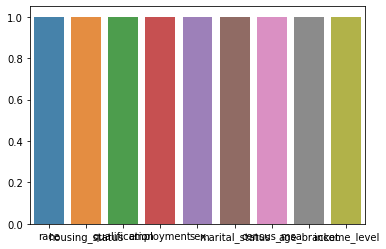

In [ ]:
category_count = data_clean_category.columns.value_counts()

sns.barplot(category_count.index,category_count.values,alpha=0.9)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


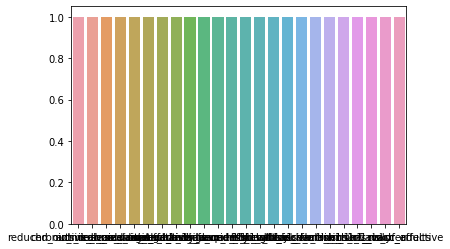

In [ ]:
numeric_count = data_clean_numeric.columns.value_counts()

sns.barplot(numeric_count.index,numeric_count.values,alpha=0.9)

plt.show()

In [ ]:
data_clean_category.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [ ]:
data_clean_numeric.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
data_clean_category.dtypes

age_bracket       category
qualification     category
race              category
sex               category
income_level      category
marital_status    category
housing_status    category
employment        category
census_msa        category
dtype: object

In [ ]:
data_clean_numeric.dtypes

h1n1_worry                   category
h1n1_awareness               category
antiviral_medication         category
contact_avoidance            category
bought_face_mask             category
wash_hands_frequently        category
avoid_large_gatherings       category
reduced_outside_home_cont    category
avoid_touch_face             category
dr_recc_h1n1_vacc            category
dr_recc_seasonal_vacc        category
chronic_medic_condition      category
cont_child_undr_6_mnths      category
is_health_worker             category
has_health_insur             category
is_h1n1_vacc_effective       category
is_h1n1_risky                category
sick_from_h1n1_vacc          category
is_seas_vacc_effective       category
is_seas_risky                category
sick_from_seas_vacc          category
no_of_adults                 category
no_of_children               category
h1n1_vaccine                 category
dtype: object

In [ ]:
data_clean_category

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [ ]:
data_clean_category['age_bracket'] = data_clean_category['age_bracket'].cat.codes

data_clean_category['qualification'] =data_clean_category['qualification'].cat.codes

data_clean_category['race']=data_clean_category['race'].cat.codes

data_clean_category['sex']=data_clean_category['sex'].cat.codes

data_clean_category['income_level']=data_clean_category['income_level'].cat.codes

data_clean_category['marital_status']=data_clean_category['marital_status'].cat.codes

data_clean_category['housing_status']=data_clean_category['housing_status'].cat.codes

data_clean_category['employment']=data_clean_category['employment'].cat.codes

data_clean_category['census_msa'] = data_clean_category['census_msa'].cat.codes

In [ ]:
data_clean_category.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,1,3,0,2,1,0,1,2
1,1,0,3,1,2,1,1,0,0
2,0,2,3,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1
4,2,3,3,0,0,0,0,0,0


In [ ]:
data_clean_numeric.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [ ]:
data_clean_numeric = data_clean_numeric.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
data_clean_numeric.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [ ]:
print(type(data_clean_category))
print(type(data_clean_numeric))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Merging all data

Integrating category data with numeric data

In [ ]:
covid_data = pd.concat([data_clean_category,data_clean_numeric],
                       join='outer',
                      axis=1)

covid_data.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,3,1,3,0,2,1,0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,1,0,3,1,2,1,1,0,0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,0,2,3,1,0,1,0,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,4,0,3,0,2,1,1,1,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2,3,3,0,0,0,0,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [ ]:
X = covid_data.iloc[:,:-1]

y = covid_data.iloc[:,-1]

In [ ]:
X.shape,y.shape

((26707, 32), (26707,))

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.shape

(26707, 80)

In [ ]:
X.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,h1n1_worry_0.0,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_0.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_0.0,antiviral_medication_1.0,contact_avoidance_0.0,contact_avoidance_1.0,bought_face_mask_0.0,bought_face_mask_1.0,wash_hands_frequently_0.0,wash_hands_frequently_1.0,avoid_large_gatherings_0.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_0.0,reduced_outside_home_cont_1.0,avoid_touch_face_0.0,avoid_touch_face_1.0,dr_recc_h1n1_vacc_0.0,dr_recc_h1n1_vacc_1.0,dr_recc_seasonal_vacc_0.0,dr_recc_seasonal_vacc_1.0,chronic_medic_condition_0.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_0.0,cont_child_undr_6_mnths_1.0,is_health_worker_0.0,is_health_worker_1.0,has_health_insur_0.0,has_health_insur_1.0,is_h1n1_vacc_effective_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_1.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_1.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_1.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_1.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_1.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,no_of_adults_0.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,3,1,3,0,2,1,0,1,2,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,1,0,3,1,2,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0,2,3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,2,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


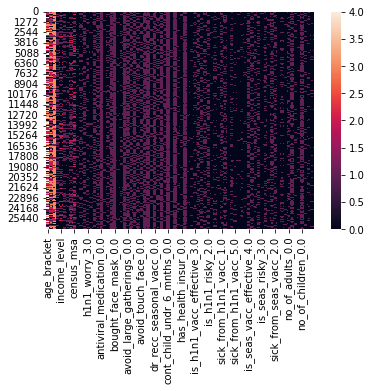

In [ ]:
sns.heatmap(X)

In [ ]:
covid = pd.concat([X,y],axis=1)

In [ ]:
covid.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,h1n1_worry_0.0,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_0.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_0.0,antiviral_medication_1.0,contact_avoidance_0.0,contact_avoidance_1.0,bought_face_mask_0.0,bought_face_mask_1.0,wash_hands_frequently_0.0,wash_hands_frequently_1.0,avoid_large_gatherings_0.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_0.0,reduced_outside_home_cont_1.0,avoid_touch_face_0.0,avoid_touch_face_1.0,dr_recc_h1n1_vacc_0.0,dr_recc_h1n1_vacc_1.0,dr_recc_seasonal_vacc_0.0,dr_recc_seasonal_vacc_1.0,chronic_medic_condition_0.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_0.0,cont_child_undr_6_mnths_1.0,is_health_worker_0.0,is_health_worker_1.0,...,has_health_insur_1.0,is_h1n1_vacc_effective_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_1.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_1.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_1.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_1.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_1.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,no_of_adults_0.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,h1n1_vaccine
0,3,1,3,0,2,1,0,1,2,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,3,1,2,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,0,2,3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,4,0,3,0,2,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
type(covid)

pandas.core.frame.DataFrame

In [ ]:
X = covid.iloc[:,:-1].values  #features

y = covid.iloc[:,-1].values    #target

In [ ]:
X,y,X.shape,y.shape

(array([[3, 1, 3, ..., 0, 0, 0],
        [1, 0, 3, ..., 0, 0, 0],
        [0, 2, 3, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 0, 0, 0],
        [0, 3, 1, ..., 0, 0, 0],
        [4, 3, 3, ..., 0, 0, 0]], dtype=int16),
 [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
 Length: 26707
 Categories (2, int64): [0, 1],
 (26707, 80),
 (26707,))

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [ ]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((21365, 80), (5342, 80), (21365,), (5342,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)

In [ ]:
ytest

[1, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 5342
Categories (2, int64): [0, 1]

In [ ]:
ypred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn import model_selection 
 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [ ]:
print(sklearn.metrics.accuracy_score(ytest,ypred))

0.8412579558217896


In [ ]:
print(sklearn.metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4189
           1       0.70      0.46      0.55      1153

    accuracy                           0.84      5342
   macro avg       0.78      0.70      0.73      5342
weighted avg       0.83      0.84      0.83      5342



In [ ]:
print(sklearn.metrics.confusion_matrix(ytest,ypred))

[[3968  221]
 [ 627  526]]


In [ ]:
(3993+451) / (3993+212+676+451)

0.8334583645911477

In [ ]:
model.coef_   #Weights or coefficient

array([[ 0.11213873,  0.03504538,  0.05911011,  0.16128915,  0.02193965,
        -0.14342905, -0.07032688,  0.02698029,  0.0575333 ,  0.07405833,
         0.01344303, -0.04621883, -0.20498087, -0.10560449, -0.10949341,
         0.05139956, -0.21210155,  0.04840321, -0.05371327, -0.10998506,
        -0.17886086,  0.01516252, -0.08845569, -0.07524265,  0.01817193,
        -0.18187027, -0.04938249, -0.11431584, -0.11351298, -0.05018536,
        -1.09175106,  0.92805272,  0.15131806, -0.3150164 , -0.12467106,
        -0.03902728, -0.18542437,  0.02172603, -0.48278997,  0.31909164,
        -0.16188316, -0.00181517, -0.49523061, -0.69257105, -0.28227106,
         0.25859141,  1.04778297, -0.76684119, -0.30356348, -0.07770985,
         0.36941536,  0.61500083,  0.19576643, -0.03818458, -0.49204861,
         0.08963033,  0.0811381 , -0.18321112, -0.32664401,  0.31895154,
        -0.05007612,  0.07728138, -0.52004248, -0.11347828,  0.23852493,
         0.07811175,  0.15318574,  0.19861394,  0.0

In [ ]:
model.intercept_

array([-0.19105624])

In [ ]:
Vaccinators = pd.DataFrame(ypred)
Vaccinators.value_counts()

0    4595
1     747
dtype: int64

In [ ]:
print('Default Logistic Regression Accuracy Training Score',model.score(Xtrain,ytrain))
print('Default Logistic Regression Accuracy Test Score',model.score(Xtest,ytest))

Default Logistic Regression Accuracy Training Score 0.8355253919962555
Default Logistic Regression Accuracy Test Score 0.8412579558217896


# Logistic Regression using MLE

In [ ]:
covid.shape  #Checking records and variables

(26707, 81)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.formula.api import logit  #We want to use Logistic Regression in StatsModels

In [ ]:
covid_float = covid.astype('float')  #statsmodels require dataset to have float values

In [ ]:
X =covid_float.iloc[:,:-1]

y = covid_float.iloc[:,-1]

In [ ]:
mle_model = logit("y~X",covid_float,).fit()

         Current function value: 0.382266
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(mle_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26707
Model:                          Logit   Df Residuals:                    26649
Method:                           MLE   Df Model:                           57
Date:                Wed, 29 Sep 2021   Pseudo R-squ.:                  0.2609
Time:                        14:19:08   Log-Likelihood:                -10209.
converged:                      False   LL-Null:                       -13813.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1726        nan        nan        nan         nan         nan
X[0]           0.1107      0.017      6.708      0.000       0.078       0.143
X[1]           0.0232      0.018      1.320      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [ ]:
print(mle_model.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.261     
Dependent Variable:    y                  AIC:                20534.3752
Date:                  2021-09-29 14:19   BIC:                21009.5507
No. Observations:      26707              Log-Likelihood:     -10209.   
Df Model:              57                 LL-Null:            -13813.   
Df Residuals:          26649              LLR p-value:        0.0000    
Converged:             0.0000             Scale:              1.0000    
No. Iterations:        35.0000                                          
------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------------
Intercept -0.1726          nan     nan    nan           nan          nan
X[0]       0.1107       0.0165  6.7083 0.0000        0.0783       0.1430
X[1]   

In [ ]:
mle_model.pred_table()    #Build Confusion Matrix

array([[19942.,  1091.],
       [ 3276.,  2398.]])

In [ ]:
mle_model.aic

20534.375217681893

In [ ]:
accuracy = (19942+2398)/(19942+1091+3276+2398)
accuracy

0.836484816714719

# Logistic Regression using SGD Model

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGDClassifier(def __init__(loss='hinge', penalty='l2', 
alpha=0.0001, 
l1_ratio=0.15, 
fit_intercept=True, 
max_iter=1000, 
tol=0.001, 
shuffle=True, 
verbose=0, 
epsilon=DEFAULT_EPSILON, 
n_jobs=None, 
random_state=None, 
learning_rate='optimal', 
eta0=0.0, 
power_t=0.5, 
early_stopping=False, 
validation_fraction=0.1, 
n_iter_no_change=5, class_weight=None, warm_start=False, average=False))

In [ ]:
sgd_clf = SGDClassifier(loss='hinge',
                       penalty='l2',
                       max_iter=1000)

In [ ]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('Training Accuracy Score',sgd_clf.score(Xtrain,ytrain))
print('Validation Accuracy Score',sgd_clf.score(Xtest,ytest))

Training Accuracy Score 0.8310788673063422
Validation Accuracy Score 0.8339573193560464


In [ ]:
sgd_clf.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sgd_clf.coef_

array([[ 7.79585767e-02, -7.79585767e-02,  1.75406798e-01,
         7.14620287e-02, -3.24827403e-02, -1.81903346e-01,
        -1.36427509e-01, -7.14620287e-02,  1.10441317e-01,
         2.66358470e-01,  1.55917153e-01,  1.42924057e-01,
        -2.59861922e-02,  6.49654806e-02,  1.94896442e-01,
         2.79351567e-01,  1.10441317e-01,  4.28772172e-01,
         3.11834307e-01,  2.27379182e-01,  2.07889538e-01,
         3.31323951e-01,  4.02785980e-01,  1.36427509e-01,
         3.83296335e-01,  1.55917153e-01,  3.18330855e-01,
         2.20882634e-01,  2.07889538e-01,  3.31323951e-01,
        -5.00234201e-01,  1.03944769e+00,  4.02785980e-01,
         1.36427509e-01,  2.01392990e-01,  3.37820499e-01,
         1.49420605e-01,  3.89792884e-01, -1.94896442e-02,
         5.58703133e-01,  2.27379182e-01,  3.11834307e-01,
        -1.42924057e-01, -3.44317047e-01, -6.49654806e-03,
         2.20882634e-01,  8.12068507e-01, -3.96289432e-01,
        -1.03944769e-01,  4.54758364e-02,  3.76799787e-0

In [ ]:
sgd_clf.intercept_

array([-6.02945491])

In [ ]:
sgd_clf.decision_function(Xtest)

array([-1.46887817, -2.74869814, -0.24752714, ..., -2.13152608,
       -2.65774647, -2.30693287])

In [ ]:
sgd_clf = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False).fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
#sgd_clf = SGDClassifier(loss='log',
#                       max_iter=5).fit(Xtrain,ytrain)

In [ ]:
sgd_clf.predict_proba(Xtest)

array([[9.94134537e-01, 5.86546327e-03],
       [9.99936980e-01, 6.30199570e-05],
       [9.83866558e-01, 1.61334422e-02],
       ...,
       [9.99249643e-01, 7.50356945e-04],
       [9.99187253e-01, 8.12747160e-04],
       [9.99805723e-01, 1.94276696e-04]])

In [ ]:
print(sgd_clf.predict_proba(Xtest))

[[9.94134537e-01 5.86546327e-03]
 [9.99936980e-01 6.30199570e-05]
 [9.83866558e-01 1.61334422e-02]
 ...
 [9.99249643e-01 7.50356945e-04]
 [9.99187253e-01 8.12747160e-04]
 [9.99805723e-01 1.94276696e-04]]


In [ ]:
sgd_ypred = sgd_clf.predict(Xtest)

In [ ]:
sklearn.metrics.accuracy_score(ytest,sgd_ypred)

0.7980157244477724

Compare Various Models

In [ ]:
#Step 5: Build models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

# Spot Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))

In [ ]:
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
 kfold = model_selection.KFold(n_splits=10, random_state=None) 
 cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy') 
 results.append(cv_results) 
 names.append(name) 
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
 print(msg) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.833982 (0.006850)
LDA: 0.831688 (0.006119)
KNN: 0.809456 (0.008149)
CART: 0.749825 (0.008915)
NB: 0.699743 (0.009057)
SVM: 0.834543 (0.007286)
DecisionTree: 0.750246 (0.009248)
Random Forest: 0.831267 (0.008250)


In [ ]:
#Now we can make prediction on most accurate model 
# Make predictions on validation dataset 
rf = RandomForestClassifier() 
rf.fit(Xtrain, ytrain) 
predictions = rf.predict(Xtest) 
print(accuracy_score(ytest, predictions)) 
print(confusion_matrix(ytest, predictions)) 
print(classification_report(ytest, predictions)) 

0.8358292774241857
[[3969  220]
 [ 657  496]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4189
           1       0.69      0.43      0.53      1153

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342

